In [1]:
import regex as re
import pandas as pd
import numpy as np
import emoji
import plotly.express as px
from collections import Counter
import matplotlib.pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

In [2]:
def startsWithDateAndTime(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -' 
    result = re.match(pattern, s)
    if result:
        return True
    return False

In [4]:
import regex as re
startsWithDateAndTime('10/10/2021, 13:03 - Mona: No placement')

True

In [5]:
def FindAuthor(s):
  s=s.split(":")
  if len(s)==2:
    return True
  else:
    return False

In [6]:
def getDataPoint(line):   
    splitLine = line.split(' - ') 
    dateTime = splitLine[0]
    date, time = dateTime.split(', ') 
    message = ' '.join(splitLine[1:])
    if FindAuthor(message): 
        splitMessage = message.split(': ') 
        author = splitMessage[0] 
        message = ' '.join(splitMessage[1:])
    else:
        author = None
    return date, time, author, message

In [9]:
uploaded= pd.read_table('C:\\Users\\Hp\\Documents\\WhatsApp Chat with Current Affairs Discussions.txt')
data = []
parsedData=[]
conversation = 'WhatsApp Chat with Current Affairs Discussions.txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline() # Skipping first line
    messageBuffer = [] 
    date, time, author = None, None, None
    while True:
        line = fp.readline() 
        if not line: 
            break
        line = line.strip() 
        if startsWithDateAndTime(line): 
            if len(messageBuffer) > 0: 
                parsedData.append([date, time, author, ' '.join(messageBuffer)]) 
            messageBuffer.clear() 
            date, time, author, message = getDataPoint(line) 
            messageBuffer.append(message) 
        else:
            messageBuffer.append(line)

In [10]:
df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message']) # Initialising a pandas Dataframe.
df["Date"] = pd.to_datetime(df["Date"])
df.tail(20)

,Date,Time,Author,Message
1236,2021-12-24,09:12,Aryan Ananya,Punjab route ki max trains bhi cancel kardi h....
1237,2021-12-24,22:40,None,David: https://youtu.be/NSmSgGVJXPE
1238,2021-12-24,23:16,None,David: https://youtu.be/xWgsNnRP1SU Confidence...
1239,2021-12-25,09:07,David,<Media omitted>
1240,2021-12-25,09:18,Mona,👍
1241,2021-12-25,14:37,None,David: https://youtu.be/aS4uvHp7ayc Probably t...
1242,2021-12-25,14:37,Himanshu,👍
1243,2021-12-25,14:44,Mona,<Media omitted>
1244,2021-12-25,14:44,Mona,<Media omitted>
1245,2021-12-25,14:46,Rohan,He's not the only one sadly🙂🙃


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1256 entries, 0 to 1255
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     1256 non-null   datetime64[ns]
 1   Time     1256 non-null   object        
 2   Author   1099 non-null   object        
 3   Message  1256 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 39.4+ KB


In [12]:
df.Author.unique()

array([None, 'Mona', 'David', 'Himanshu', 'Khushi Gupta 1st Year', 'Tina',
       'Rohan', 'Ayana', 'Kushagra Ananya', 'Kamakshi Ananya',
       'Nikhil Sir Ananya', "Jigyasa Ma'am (MA English)", 'Sankalp CE12',
       'Akash Ananya', 'Priyan 1st Year(Ananya)', 'Harshita Ananya',
       'Bhargavi Ananya', 'Aryan Ananya'], dtype=object)

In [13]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1099 entries, 2 to 1254
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     1099 non-null   datetime64[ns]
 1   Time     1099 non-null   object        
 2   Author   1099 non-null   object        
 3   Message  1099 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 42.9+ KB


In [14]:
total_messages = df.shape[0]
print(total_messages)

1099


In [15]:
media_messages = df[df['Message'] == '<Media omitted>'].shape[0]
print(media_messages)

33


In [66]:
def split_count(text):
    emoji_counter=0

    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_counter +=1
            emoji_list.append(word)

    return emoji_counter, emoji_list

df["emoji"] = df["Message"].apply(split_count)

In [80]:
emojis = sum(df['emoji'].str.len())
print(emojis)

2198


In [63]:
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()

In [64]:
links = np.sum(df.urlcount)

In [79]:
print("Current Affairs Discussion")
print("Messages:",total_messages)
print("Media:",media_messages)
print("Emojis:",emojis)
print("Links:",links)

Current Affairs Discussion
Messages: 1099
Media: 33
Emojis: 522
Links: 0


In [68]:
media_messages_df = df[df['Message'] == '<Media omitted>']

In [69]:
messages_df = df.drop(media_messages_df.index)

In [70]:
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1066 entries, 4 to 1254
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1066 non-null   datetime64[ns]
 1   Time      1066 non-null   object        
 2   Author    1066 non-null   object        
 3   Message   1066 non-null   object        
 4   emoji     1066 non-null   object        
 5   urlcount  1066 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 58.3+ KB


In [71]:
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1

In [72]:
messages_df.tail(20)

,Date,Time,Author,Message,emoji,urlcount,Letter_Count,Word_Count,MessageCount
1229,2021-12-24,08:39,David,Haan tab tak shayad na ho😂,"(0, [])",0,26,6,1
1230,2021-12-24,08:44,Mona,Kapil Mishra ne ki Sameer Wankhede se mulakat,"(0, [])",0,45,8,1
1231,2021-12-24,08:51,David,❤‍🔥,"(0, [])",0,3,1,1
1232,2021-12-24,09:08,Kushagra Ananya,Bomb blast in ludhiana,"(0, [])",0,22,4,1
1233,2021-12-24,09:08,Kushagra Ananya,2 dead,"(0, [])",0,6,2,1
1234,2021-12-24,09:09,Aryan Ananya,Kl nhi hua tha vo court me?,"(0, [])",0,27,7,1
1235,2021-12-24,09:09,Kushagra Ananya,Haan abhi hai news pe,"(0, [])",0,21,5,1
1236,2021-12-24,09:12,Aryan Ananya,Punjab route ki max trains bhi cancel kardi h....,"(0, [])",0,73,14,1
1240,2021-12-25,09:18,Mona,👍,"(0, [])",0,1,1,1
1242,2021-12-25,14:37,Himanshu,👍,"(0, [])",0,1,1,1


In [73]:
l = ["David", "Mona", "Himanshu"]
for i in range(len(l)):
  
  req_df= messages_df[messages_df["Author"] == l[i]]

  print(f'Stats of {l[i]} -')

  # number of rows which indirectly means the number of messages
  print('Messages Sent', req_df.shape[0])
  #total words in one message
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
  print('Words per message', words_per_message)
  #media messages
  media = media_messages_df[media_messages_df['Author'] == l[i]].shape[0]
  print('Media Messages Sent', media)
  #total no. of emojis
  emojis = sum(req_df['emoji'].str.len())
  print('Emojis Sent', emojis)
  #links
  links = sum(req_df["urlcount"])   
  print('Links Sent', links)   
  print()

Stats of David -
Messages Sent 392
Words per message 8.40561224489796
Media Messages Sent 7
Emojis Sent 784
Links Sent 0

Stats of Mona -
Messages Sent 135
Words per message 10.74074074074074
Media Messages Sent 14
Emojis Sent 270
Links Sent 0

Stats of Himanshu -
Messages Sent 261
Words per message 14.53639846743295
Media Messages Sent 2
Emojis Sent 522
Links Sent 0



There are 64773 words in all the messages.


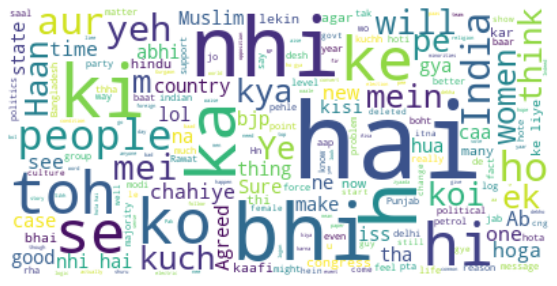

In [75]:
text = " ".join(review for review in messages_df.Message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
# Generates a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Displays the generated image by matplotlib
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


Author name Rohan


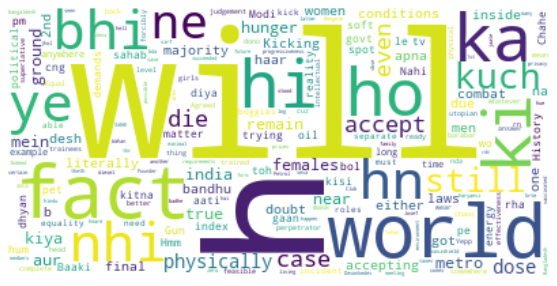

Author name Ayana


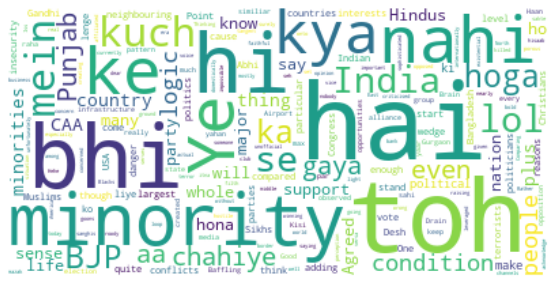

Author name Himanshu


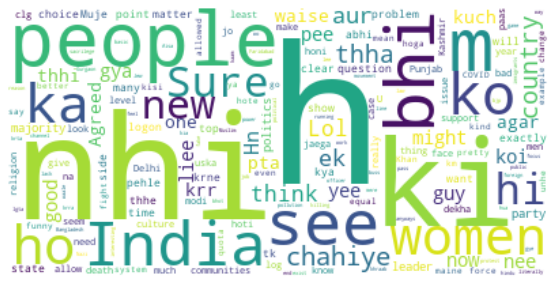

In [78]:
l = ["Rohan", "Ayana", "Himanshu"]
for i in range(len(l)):
  dummy_df = messages_df[messages_df['Author'] == l[i]]
  text = " ".join(review for review in dummy_df.Message)
  stopwords = set(STOPWORDS)
  #Generation of word cloud image
  print('Author name',l[i])
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  #Displaying the generated image   
  plt.figure( figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

Finding frequent topics of discussion in the group

All frequencies excluding irrelevant words but including emojis
         Frequency
Word              
india           41
😂               40
''              39
mei             32
😂😂              26
women           26
time            20
🙂               17
country         17
..              14
agreed          14
😂😂😂             14
bjp             14


<AxesSubplot:xlabel='Word'>

c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 128578 missing from current font.

c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning:

Glyph 128578 missing from current font.



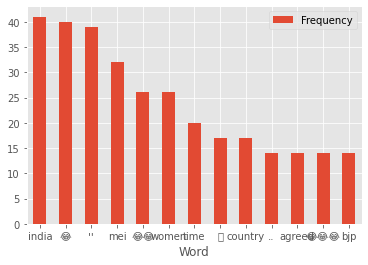

In [164]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import nltk
from nltk.corpus import stopwords


from nltk.tokenize import word_tokenize
with open ('C:\\Users\\Hp\\Documents\\HinglishStopwords.txt') as fin:
    irrelevantWords = word_tokenize(fin.read())



top_N = 13
txt = df['Message'].str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(txt)
word_dist = nltk.FreqDist(words)

words_except_stop_dist = nltk.FreqDist(w for w in words if w not in irrelevantWords)
print('All frequencies excluding irrelevant words but including emojis')

print('=' * 60)

rslt = pd.DataFrame(words_except_stop_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
print(rslt)

matplotlib.style.use('ggplot')

rslt.plot.bar(rot=0)

common political topics and messages about it

In [156]:
bjp_df = df[df['Message'].str.contains(pat = 'bjp')]
congress_df = df[df['Message'].str.contains(pat = 'congress')]
election_df = df[df['Message'].str.contains(pat = 'election')]
minority_df = df[df['Message'].str.contains(pat = 'minority')]
majority_df = df[df['Message'].str.contains(pat = 'majority')]


In [158]:
bjp_df.head(10)


,Date,Time,Author,Message,emoji,urlcount
308,2021-10-21,13:38,David,Congress bjp alternate hona chahiye har 5 saal...,"(0, [])",0
336,2021-10-21,14:02,Himanshu,We're judging comparing the bjp in it's younge...,"(0, [])",0
343,2021-10-21,14:06,Himanshu,Muje nhi lgta uss level tk jaa paegi bjp but o...,"(0, [])",0
409,2021-10-26,18:29,Himanshu,😂lol party member h bjp proper pdhe likhe 3 de...,"(0, [])",0
918,2021-11-19,10:12,David,"Achha hua, ulta samay shuru bjp is not invincible","(0, [])",0
920,2021-11-19,10:15,Ayana,Punjab mein bjp+captain ki party?,"(0, [])",0
976,2021-11-24,00:23,Mona,"Cong vs bjp ki 160+ seats hein, agar yahan se ...","(0, [])",0
979,2021-11-24,00:30,David,Akalis ne mana kar diya hai most parties seem ...,"(0, [])",0
1001,2021-11-24,21:25,David,Aditi Singh jiski Raga se shaadi ki khabar udi...,"(0, [])",0
1038,2021-03-12,15:02,David,"Sikh congress equation ko bjp muslim, christia...","(0, [])",0


In [159]:
congress_df.head(10)


,Date,Time,Author,Message,emoji,urlcount
9,2021-10-10,18:03,David,Koi congress ke UP campaign ko follow kar rha hai,"(0, [])",0
335,2021-10-21,14:02,Ayana,Varna congress jaisa haal hota hein,"(0, [])",0
975,2021-11-24,00:15,David,Mamta and kejru both need to have atleast 40 M...,"(0, [])",0
1003,2021-11-25,10:33,David,"TMC is destroying congress, one state at a time","(0, [])",0
1032,2021-03-12,12:00,David,Sidhu moosewala ne congress join karli,"(0, [])",0
1036,2021-03-12,13:35,Himanshu,Gaano m ullekh krte thhe sidhu sahab 84 ka aur...,"(0, [])",0
1037,2021-03-12,14:17,Mona,84 itna matter nhi karta Sikhs ke liye congres...,"(0, [])",0
1038,2021-03-12,15:02,David,"Sikh congress equation ko bjp muslim, christia...","(0, [])",0


In [161]:
election_df.head(10)


,Date,Time,Author,Message,emoji,urlcount
252,2021-10-21,13:02,Ayana,"Thinking about it, winning elections without t...","(0, [])",0
709,2021-01-11,18:07,Mona,Ab jab bhi vo election jeetega mehnat karke je...,"(0, [])",0
717,2021-01-11,18:10,Mona,Smart politicians win elections but who will r...,"(0, [])",0
736,2021-01-11,18:28,Mona,By election me kya hoga,"(0, [])",0
982,2021-11-24,00:31,Ayana,Not aware of this development par election mei...,"(0, [])",0
1099,2021-08-12,14:45,David,Ab yeh kaun bol rha hai ki UP election ke liye...,"(0, [])",0


In [162]:
minority_df.head(10)


,Date,Time,Author,Message,emoji,urlcount
221,2021-10-21,12:13,Ayana,lol people here are faithful to the cause of c...,"(0, [])",0
232,2021-10-21,12:39,Ayana,They are being criticised both domestically an...,"(0, [])",0
235,2021-10-21,12:45,Ayana,"Point being, both of these things are wrong bu...","(0, [])",0
262,2021-10-21,13:06,Ayana,"Hindus, Sikhs and Christians. Major minority c...","(0, [])",0
288,2021-10-21,13:25,Ayana,USA in 1900s/ late 1800s was attracting immigr...,"(0, [])",0


In [165]:
majority_df.head(10)

,Date,Time,Author,Message,emoji,urlcount
128,2021-10-18,13:34,Rohan,Equal physical effectiveness is only feasible ...,"(0, [])",0
228,2021-10-21,12:20,Himanshu,Kafi jgaah similarities dekhi jaati h waise wh...,"(0, [])",0
240,2021-10-21,12:51,Mona,Though Muslims are also killed but it should b...,"(0, [])",0
247,2021-10-21,12:58,Himanshu,Sure the motives are pretty evident to drive a...,"(0, [])",0
254,2021-10-21,13:03,Mona,"I will not equate the both, one is a super maj...","(0, [])",0
350,2021-10-21,19:26,Ayana,Doomed hai desh ya nahi yeh toh nahi pata.. Bu...,"(0, [])",0


In [169]:
plt.figure(figsize=(9,6))
mostly_active = df['Author'].value_counts()
#Top 5 contributer in the chat 
mostly_active.head(5)



David       399
Himanshu    263
Mona        149
Tina        103
Ayana        78
Name: Author, dtype: int64

<Figure size 648x432 with 0 Axes>

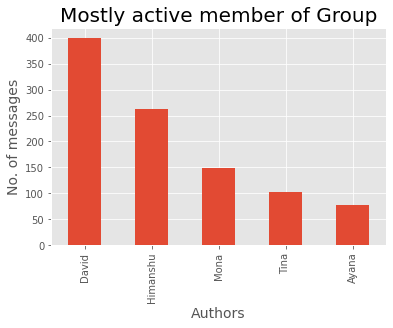

In [170]:
m_a = mostly_active.head(5)
bars = ['David','Himanshu','Mona','Tina', 'Ayana']
x_pos = np.arange(len(bars))
m_a.plot.bar()
plt.xlabel('Authors',fontdict={'fontsize': 14,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 14,'fontweight': 10})
plt.title('Mostly active member of Group',fontdict={'fontsize': 20,'fontweight': 8})
plt.xticks(x_pos, bars)
plt.show()

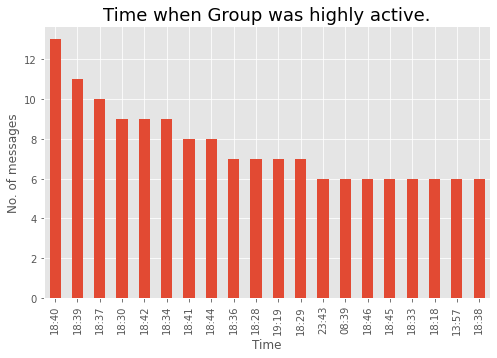

In [172]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
plt.figure(figsize=(8,5))
t = df['Time'].value_counts().head(20)
tx = t.plot.bar()
tx.yaxis.set_major_locator(MaxNLocator(integer=True))  #Converting y axis data to integer
plt.xlabel('Time',fontdict={'fontsize': 12,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 12,'fontweight': 10})
plt.title('Time when Group was highly active.',fontdict={'fontsize': 18,'fontweight': 8})
plt.show()